# Merging IOWA Education Data

## 1. Installing and Importing Packages

In [ ]:
!pip install pymongo

In [17]:
import pymongo
from pymongo import MongoClient
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from sqlalchemy import create_engine
import mysql.connector
import warnings
warnings.filterwarnings('ignore')

## 2. Connection Information

### 2.1. NCI Open Stack Private Cloud Instance IP

In [22]:
HOST = '87.44.4.25'

### 2.2. Mongo Database Connection Credentials and Port


In [23]:
MONGO_DATABASE_NAME = 'iowa_state_education_db'
MONGO_DATABASE_USER_NAME = 'DAP_PROJ_USER'
MONGO_DATABASE_USER_PASSWORD = 'DAP_PROJ_25'
MONGO_DATABASE_PORT = 27017

### 2.3.The MySQL Data Base Connection Credentials and Port

In [24]:
MYSQL_DATABASE_NAME = 'iowa_edu_db'
MYSQL_DATABASE_USER_NAME = 'dap_user'
MYSQL_DATABASE_USER_PASSWORD = 'Dap_456'
MYSQL_DATABASE_PORT = 3306


## 3. Fetch Iowa State 4 Year Graducation Rate Data from Mongo DB which is hosted in NCI Private Cloud Ubuntu Machine

In [25]:
client = MongoClient(f'mongodb://{MONGO_DATABASE_USER_NAME}:{MONGO_DATABASE_USER_PASSWORD}@{HOST}:{MONGO_DATABASE_PORT}/{MONGO_DATABASE_NAME}')
db = client[MONGO_DATABASE_NAME]
iowa_graduation_rate_collection = db['iowa_graduation_rate_preprocessed']
iowa_graduation_rate_documents = iowa_graduation_rate_collection.find()
iowa_graduation_rate_df = pd.DataFrame(list(iowa_graduation_rate_documents))

In [26]:
iowa_graduation_rate_df.head()

,_id,graduating_class,fall_freshman_year,district,district_name,graduates,total_cohort,graduation_rate,graduation_rate_category
0,6448449ac78ea6dce9d5851b,2016,2012,0009,AGWSR,35.0,35.0,100.0,90.1 - 100%
1,6448449ac78ea6dce9d5851c,2015,2011,0009,AGWSR,44.0,45.0,97.8,90.1 - 100%
2,6448449ac78ea6dce9d5851d,2014,2010,0009,AGWSR,46.0,46.0,100.0,90.1 - 100%
3,6448449ac78ea6dce9d5851e,2017,2013,0009,AGWSR,36.0,39.0,92.3,90.1 - 100%
4,6448449ac78ea6dce9d5851f,2009,2005,0009,AGWSR,42.0,46.0,91.3,90.1 - 100%


In [32]:
iowa_graduation_rate_df.shape

(3566, 9)

## 4. Fetch Math And Reading Proficiency in Iowa by School Year, Public School District and Grade Level

In [29]:
cnx = mysql.connector.connect(user='dap_user', password='Dap_456', host='87.44.4.25', database='iowa_edu_db')

In [36]:
query = "SELECT * FROM preprocesses_iowa_scores"
math_and_reading_proficiency_df = pd.read_sql_query(query, cnx)

In [37]:
math_and_reading_proficiency_df.head()

,School Year,Topic,Grade,District,District Name,Proficient,Total,% Proficient,Proficient Category
0,2016,Reading,4,4572,Murray,15.0,23.0,65.2,60.1 - 70%
1,2016,Reading,3,3465,Lamoni,12.0,16.0,75.0,70.1 - 80%
2,2016,Math,8,6102,Spencer,108.0,131.0,82.4,80.1 - 90%
3,2016,Math,6,4269,Midland Comm School District,17.0,27.0,63.0,60.1 - 70%
4,2016,Math,4,234,Anamosa,62.0,75.0,82.7,80.1 - 90%


In [33]:
math_and_reading_proficiency_df.shape

(9366, 14)

## 5. Merging the IOWA Math and Reading Proficiency Data and IOWA Graduation Data

In [38]:
iowa_graduation_rate_df.columns

Index(['_id', 'graduating_class', 'fall_freshman_year', 'district',
       'district_name', 'graduates', 'total_cohort', 'graduation_rate',
       'graduation_rate_category'],
      dtype='object')

In [49]:
iowa_graduation_rate_df['School Year'] = iowa_graduation_rate_df['School Year'].astype(int)

In [50]:
iowa_graduation_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3566 entries, 0 to 3565
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   _id                       3566 non-null   object 
 1   School Year               3566 non-null   int32  
 2   fall_freshman_year        3566 non-null   object 
 3   district                  3566 non-null   object 
 4   district_name             3566 non-null   object 
 5   graduates                 3566 non-null   float64
 6   total_cohort              3566 non-null   float64
 7   graduation_rate           3566 non-null   float64
 8   graduation_rate_category  3566 non-null   object 
dtypes: float64(3), int32(1), object(5)
memory usage: 236.9+ KB


In [51]:
math_and_reading_proficiency_df.columns

Index(['School Year', 'Topic', 'Grade', 'District', 'District Name',
       'Proficient', 'Total', '% Proficient', 'Proficient Category'],
      dtype='object')

In [52]:
math_and_reading_proficiency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8860 entries, 0 to 8859
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   School Year          8860 non-null   int64  
 1   Topic                8860 non-null   object 
 2   Grade                8860 non-null   int64  
 3   District             8860 non-null   int64  
 4   District Name        8860 non-null   object 
 5   Proficient           8860 non-null   float64
 6   Total                8860 non-null   float64
 7   % Proficient         8860 non-null   float64
 8   Proficient Category  8860 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 623.1+ KB


In [53]:
# We have Columns which are more related like 1. 'District Name' ,
# 2. Graduating_Class from iowa_graduation_rate_df and Shool_Year from math_and_reading_proficiency_df

In [60]:

iowa_graduation_rate_df.rename(columns={'district_name' : 'District Name'}, inplace=True)

In [61]:
iowa_math_reading_proficiency_graduation_rate_df = pd.merge(iowa_graduation_rate_df, math_and_reading_proficiency_df, on = 'District Name')

In [62]:
iowa_math_reading_proficiency_graduation_rate_df.shape

(43610, 17)

In [63]:
iowa_math_reading_proficiency_graduation_rate_df.head()

,_id,School Year_x,fall_freshman_year,district,District Name,graduates,total_cohort,graduation_rate,graduation_rate_category,School Year_y,Topic,Grade,District,Proficient,Total,% Proficient,Proficient Category
0,6448449ac78ea6dce9d58526,2009,2005,0018,Adair-Casey,29.0,30.0,96.7,90.1 - 100%,2016,Reading,4,18,11.0,16.0,68.8,60.1 - 70%
1,6448449ac78ea6dce9d58526,2009,2005,0018,Adair-Casey,29.0,30.0,96.7,90.1 - 100%,2016,Reading,8,18,15.0,21.0,71.4,70.1 - 80%
2,6448449ac78ea6dce9d58526,2009,2005,0018,Adair-Casey,29.0,30.0,96.7,90.1 - 100%,2016,Math,5,18,22.0,26.0,84.6,80.1 - 90%
3,6448449ac78ea6dce9d58526,2009,2005,0018,Adair-Casey,29.0,30.0,96.7,90.1 - 100%,2016,Reading,11,18,11.0,13.0,84.6,80.1 - 90%
4,6448449ac78ea6dce9d58526,2009,2005,0018,Adair-Casey,29.0,30.0,96.7,90.1 - 100%,2016,Reading,5,18,18.0,26.0,69.2,60.1 - 70%


## 5. Visualization of Merged Data

In [64]:
iowa_math_reading_proficiency_graduation_rate_df.columns

Index(['_id', 'School Year_x', 'fall_freshman_year', 'district',
       'District Name', 'graduates', 'total_cohort', 'graduation_rate',
       'graduation_rate_category', 'School Year_y', 'Topic', 'Grade',
       'District', 'Proficient', 'Total', '% Proficient',
       'Proficient Category'],
      dtype='object')

### 5.1. Graduation Rate Category by % Proficiency

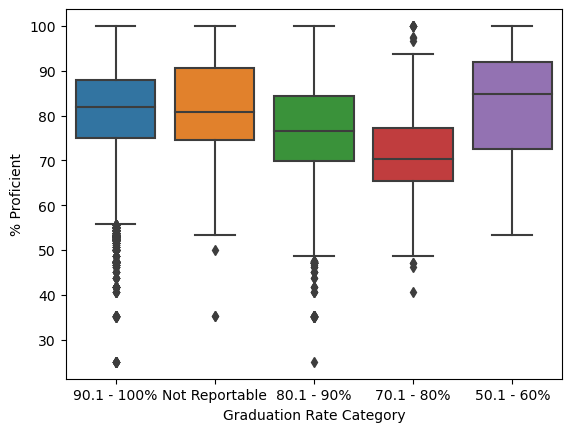

In [70]:
# creating the box plot
sns.boxplot(x='graduation_rate_category', y='% Proficient', data=iowa_math_reading_proficiency_graduation_rate_df)

# setting axis labels
plt.xlabel('Graduation Rate Category')
plt.ylabel('% Proficient')

# displaying plot
plt.show()


In [78]:
grouped_df = iowa_math_reading_proficiency_graduation_rate_df.groupby('graduation_rate_category')['% Proficient'].describe()

grouped_df


,count,mean,std,min,25%,50%,75%,max
graduation_rate_category,,,,,,,,
50.1 - 60%,24.0,81.150000,13.972395,53.3,72.625,84.8,91.85,100.0
70.1 - 80%,1280.0,72.076797,9.751889,40.5,65.400,70.4,77.30,100.0
80.1 - 90%,10418.0,76.629977,10.167642,25.0,69.825,76.5,84.30,100.0
90.1 - 100%,31040.0,80.710180,9.908768,25.0,75.000,81.8,87.90,100.0
Not Reportable,848.0,80.972995,11.023673,35.3,74.475,80.8,90.50,100.0


### 5.2. Graduation Rate Category

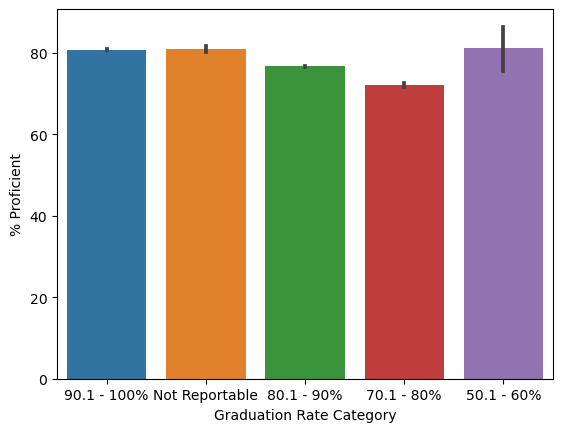

In [73]:
import seaborn as sns

# creating bar chart
sns.barplot(x='graduation_rate_category', y='% Proficient', data=iowa_math_reading_proficiency_graduation_rate_df)

# setting the axis labels
plt.xlabel('Graduation Rate Category')
plt.ylabel('% Proficient')

# displaying plot
plt.show()


In [81]:
grouped_df = iowa_math_reading_proficiency_graduation_rate_df.groupby('graduation_rate_category')['% Proficient'].agg(['mean', 'std'])

grouped_df


,mean,std
graduation_rate_category,,
50.1 - 60%,81.150000,13.972395
70.1 - 80%,72.076797,9.751889
80.1 - 90%,76.629977,10.167642
90.1 - 100%,80.710180,9.908768
Not Reportable,80.972995,11.023673


### 5.3. Correlation Between Graduates, Total_Cohort, graduation_rate and % Proficient

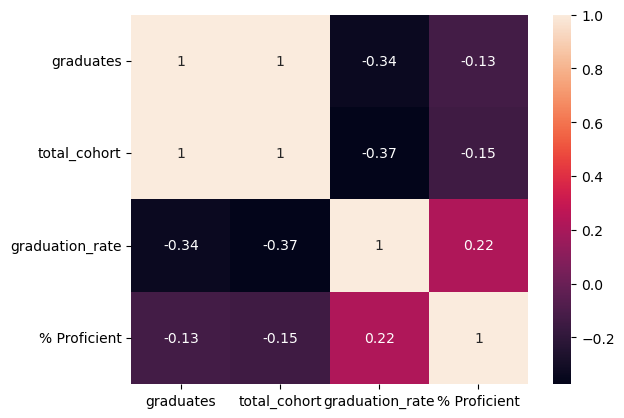

In [75]:
# selecting relevant columns for correlation matrix
corr_df = iowa_math_reading_proficiency_graduation_rate_df[['graduates', 'total_cohort', 'graduation_rate', '% Proficient']]

corr = corr_df.corr()

sns.heatmap(corr, annot=True)

# displaying plot
plt.show()


In [83]:
# selecting columns for correlation matrix
corr_df = iowa_math_reading_proficiency_graduation_rate_df[['graduates', 'total_cohort', 'graduation_rate', '% Proficient']]

# correlation matrix
corr = corr_df.corr()

# round correlation matrix to 2 decimal places
corr = corr.round(2)

# displaying correlation matrix as table
corr


,graduates,total_cohort,graduation_rate,% Proficient
graduates,1.00,1.00,-0.34,-0.13
total_cohort,1.00,1.00,-0.37,-0.15
graduation_rate,-0.34,-0.37,1.00,0.22
% Proficient,-0.13,-0.15,0.22,1.00


### 5.4 Graduation Rate Category and School Year Correlation

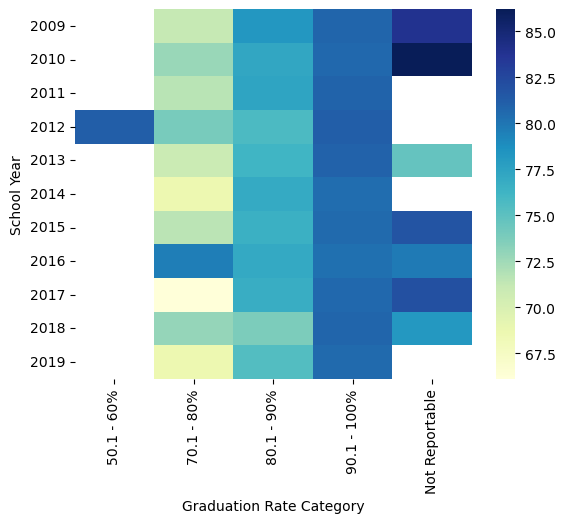

In [84]:
import seaborn as sns

iowa_math_reading_proficiency_graduation_rate_pivot = pd.pivot_table(iowa_math_reading_proficiency_graduation_rate_df, values='% Proficient', index='School Year_x', columns='graduation_rate_category')

sns.heatmap(iowa_math_reading_proficiency_graduation_rate_pivot, cmap='YlGnBu')

plt.xlabel('Graduation Rate Category')
plt.ylabel('School Year')

plt.show()


In [90]:
iowa_math_reading_proficiency_graduation_rate_pivot = pd.pivot_table(iowa_math_reading_proficiency_graduation_rate_df, values='% Proficient', index='School Year_x', columns='graduation_rate_category')
iowa_math_reading_proficiency_graduation_rate_pivot


graduation_rate_category,50.1 - 60%,70.1 - 80%,80.1 - 90%,90.1 - 100%,Not Reportable
School Year_x,,,,,
2009,NaN,71.183696,78.275592,80.801933,83.887838
2010,NaN,72.713492,77.226322,80.689248,86.206522
2011,NaN,71.659677,77.416448,80.929405,NaN
2012,81.15,73.912295,75.767135,81.114387,NaN
2013,NaN,70.831250,76.209320,80.997426,74.700000
2014,NaN,68.692857,76.952330,80.435675,NaN
2015,NaN,71.567857,76.563100,80.600601,81.743421
2016,NaN,79.553750,77.079643,80.256620,79.804825
2017,NaN,66.119643,76.727918,80.667364,81.999194


### 5.5. School Year and Total Cohort

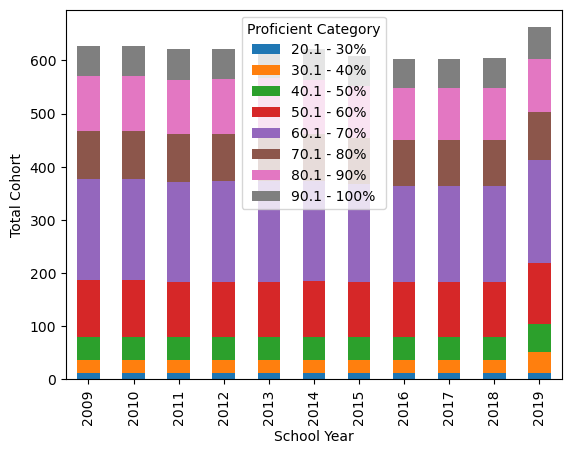

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

iowa_math_reading_proficiency_graduation_rate_pivot = pd.pivot_table(iowa_math_reading_proficiency_graduation_rate_df, values='Total', index='School Year_x', columns='Proficient Category')

iowa_math_reading_proficiency_graduation_rate_pivot.plot(kind='bar', stacked=True)

plt.xlabel('School Year')
plt.ylabel('Total Cohort')

plt.show()


In [92]:

iowa_math_reading_proficiency_graduation_rate_pivot


Proficient Category,20.1 - 30%,30.1 - 40%,40.1 - 50%,50.1 - 60%,60.1 - 70%,70.1 - 80%,80.1 - 90%,90.1 - 100%
School Year_x,,,,,,,,
2009,12.0,24.666667,42.851852,106.437500,190.372549,90.655172,102.995392,57.822951
2010,12.0,24.666667,42.851852,106.437500,190.372549,90.655172,102.995392,57.822951
2011,12.0,24.666667,42.851852,103.365672,188.429400,90.050753,102.662080,57.811166
2012,12.0,24.666667,42.851852,103.671642,189.307393,89.892660,101.660661,57.854575
2013,12.0,24.666667,42.851852,104.180451,190.144814,90.281970,102.057402,58.115132
2014,12.0,24.666667,42.851852,104.646617,188.692456,89.530008,100.994834,57.951220
2015,12.0,24.666667,42.851852,102.750000,184.406780,87.747161,98.329312,56.464174
2016,12.0,24.666667,42.851852,103.746269,180.942910,86.572485,97.315164,55.316742
2017,12.0,24.666667,42.851852,103.746269,180.942910,86.572485,97.315164,55.316742


## 6. Storing merged data back to Mongo DB

In [101]:
iowa_math_reading_proficiency_graduation_rate_df.drop(['_id'], axis = 1, inplace= True)

In [102]:
client = MongoClient(f'mongodb://{MONGO_DATABASE_USER_NAME}:{MONGO_DATABASE_USER_PASSWORD}@{HOST}:{MONGO_DATABASE_PORT}/{MONGO_DATABASE_NAME}')
db = client[MONGO_DATABASE_NAME]
iowa_education_data_merged_collection = db['iowa_education_data_merged']
iowa_education_data_merged_collection.drop()
iowa_education_data_merged_collection.insert_many(iowa_math_reading_proficiency_graduation_rate_df.to_dict(orient='records'))